# Demonstration of JIN_pylib for DAS data processing and vitualization


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jinwar/JIN_pylib/blob/master/examples/jin_pylib_demonstration.ipynb)

## Download the package and import

In [1]:
# default import
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# download and install my own python package, click the url below for more details
!git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal,Data2D_XT


Cloning into 'jin_pylib'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 256 (delta 44), reused 51 (delta 29), pack-reused 187
Receiving objects: 100% (256/256), 98.45 KiB | 4.92 MiB/s, done.
Resolving deltas: 100% (151/151), done.


## Download open-source DAS data
Name: Collection of earthquakes recorded by the San Andreas Fault Observatory at Depth (SAFOD) DAS array

Access: https://github.com/ariellellouch/DASDetection

Data Volume: 1 Gb

Last checked: November 2019

Experiment Location: San Andreas Fault, California, USA

Experiment Dates: Summer 2017

Instrument: Optasense ODH-3

Contact: Ariel Lellouch (Stanford University) 

Publications to-date: [Lellouch et al., 2019](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2019JB017533), [Lellouch et al., 2019b](https://pubs.geoscienceworld.org/ssa/bssa/article-abstract/109/6/2491/575006/Velocity-Based-Earthquake-Detection-Using-Downhole?redirectedFrom=fulltext)

In [2]:
# download an earthquake event from San Andreas Fault Observatory at Depth (SAFOD) DAS array

!gdown https://github.com/ariellellouch/DASDetection/raw/master/2017-06-30T15:05:13.000000Z_mag2.46.npy

data = np.load('./2017-06-30T15:05:13.000000Z_mag2.46.npy')
print(data.shape)
# 2D DAS data, 800 channels with 60 s of data. channel spacing is 1m and temporal sampling rate is 250 Hz

Downloading...
From: https://github.com/ariellellouch/DASDetection/raw/master/2017-06-30T15:05:13.000000Z_mag2.46.npy
To: /content/2017-06-30T15:05:13.000000Z_mag2.46.npy
100% 48.0M/48.0M [00:01<00:00, 34.7MB/s]
(800, 14999)


## Data processing and visualization

In [3]:
# creating a Data2D class instance

DASdata = Data2D_XT.Data2D() # initiate instance
DASdata.data = data   # DAS data in 2D array, the first axis is distance and second axis is time
DASdata.taxis = np.arange(data.shape[1])/250.0  # 1D array for time grid, unit in second. 
DASdata.daxis = np.arange(data.shape[0])*1.0  # 1D array for distance grid, unit in meter
DASdata.start_time = datetime(2017,6,30,15,5,13)


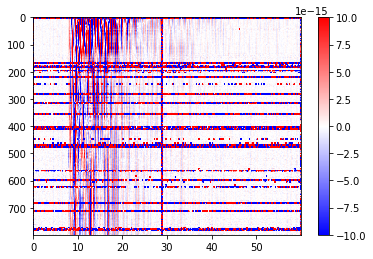

In [4]:
# making waterfall plot, an earthquake event can be observed between 8s to 30 s

cx = np.array([-1,1])
DASdata.plot_waterfall()
plt.clim(cx*1e-14)
plt.colorbar()

In [9]:
# select a sub dataset
sub_data = DASdata.select_time(5,15,makecopy=True,reset_starttime=False)

# apply low-pass filter
sub_data.lp_filter(20) 

# other options include hp_filter (high pass filter) and bp_filter (band pass filter)



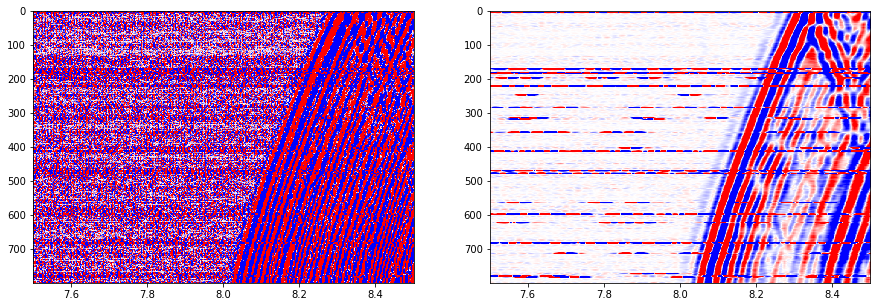

In [8]:
# compare the data before and after low-pass filter

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
DASdata.plot_waterfall()
plt.clim(cx*1e-12)
plt.xlim(7.5,8.5)

plt.subplot(1,2,2)
sub_data.plot_waterfall()
plt.xlim(7.5,8.5)
plt.clim(cx*1e-12)